In [177]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.naive_bayes as nb

%matplotlib inline

In [178]:
np.random.seed(0)

In [179]:
iris = datasets.load_iris()
Data = iris.data
Target = iris.target
DT = np.append(Data,Target.reshape(150,1),axis=1)
np.random.shuffle(DT)

Data = DT[:,:4]
Target = DT[:,4]

In [180]:
def train_validate_test_split(data, labels, testRatio=0.3, valRatio=0.3):
    # Split the data into train, validate, and test sets
    x,y,z = np.split(data, [int(len(data)*(testRatio)), int(len(data)*(testRatio+valRatio))])
    a,b,c = np.split(labels, [int(len(labels)*(testRatio)), int(len(data)*(testRatio+valRatio))])
    return [x,y,z], [a,b,c]

In [181]:
dSplit, lSplit = train_validate_test_split(Data, Target, testRatio=0.3, valRatio=0.3)

In [182]:
def trainNaiveSet(data, label):
    return [ nb.GaussianNB().fit(data, label), nb.MultinomialNB().fit(data, label), nb.BernoulliNB().fit(data, label)]


In [183]:
def accuracyFun(pred, labels):
    return np.sum(pred == labels)/len(labels)


In [184]:
def bestModel(models, data, labels):
    return models[np.argmax([accuracyFun(model.predict(data), labels) for model in models])]

In [185]:
fullDataSetModels = trainNaiveSet(dSplit[0], lSplit[0])
choosenModel = bestModel(fullDataSetModels, dSplit[1], lSplit[1])
print("Best model is model", choosenModel)

Best model is model GaussianNB()


In [186]:
Accuracy = accuracyFun(choosenModel.predict(dSplit[2]), lSplit[2])
print("Accuracy of choosen model is", Accuracy)

Accuracy of choosen model is 0.9666666666666667


In [187]:
N = 100
#lin space from min of first feature to max
X = np.linspace(np.min(Data[:,0]), np.max(Data[:,0]), N)
Y = np.linspace(np.min(Data[:,1]), np.max(Data[:,1]), N)
F3 = np.linspace(np.min(Data[:,2]), np.max(Data[:,2]), N)
F4 = np.linspace(np.min(Data[:,3]), np.max(Data[:,3]), N)


XX, YY = np.meshgrid(X, Y)

## for every f3 and f4 value calculate all possible combinations of x and y then find f3 and f4 that maximize the variance of the prediction
## then plot the prediction for all x and y values
maxvar = 0
cf3, cf4 = 0, 0
for f3 in F3:
     for f4 in F4:
         inputGrid = np.array([XX.flatten(), YY.flatten(), [f3]*XX.shape[0]*YY.shape[0], [f4]*XX.shape[0]*YY.shape[0]]).T
         vthis = np.var(choosenModel.predict(inputGrid))
         if vthis > maxvar:
            maxvar = vthis
            cf3, cf4 = f3, f4

inputGrid = np.array([XX.flatten(), YY.flatten(), [cf3]*XX.shape[0]*YY.shape[0], [cf4]*XX.shape[0]*YY.shape[0]]).T
pred = choosenModel.predict(inputGrid)



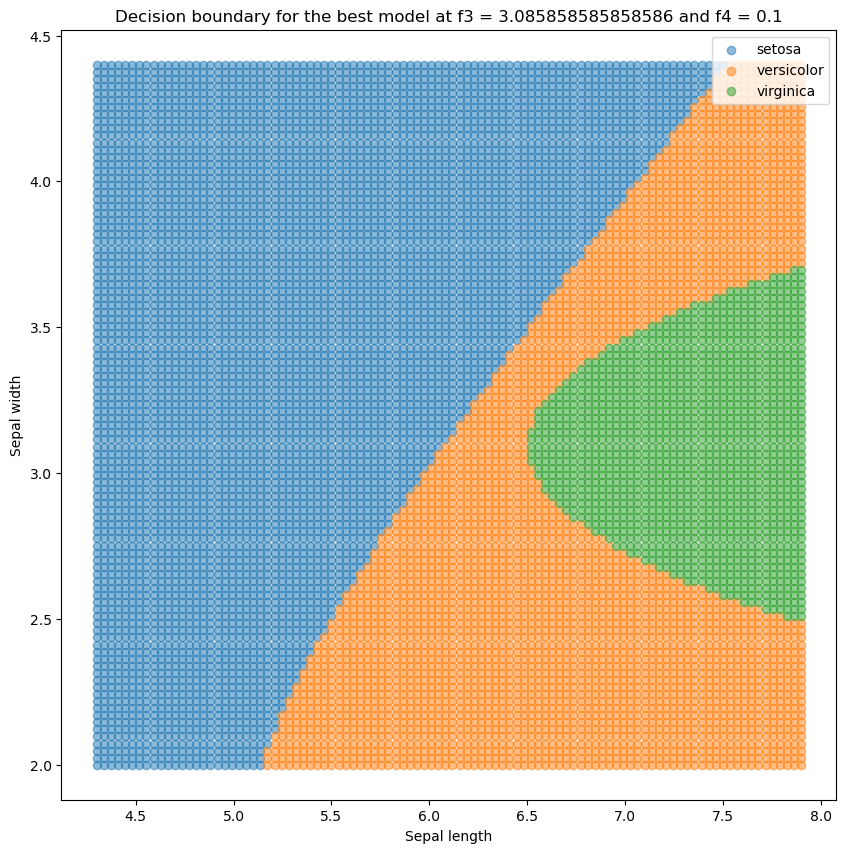

In [188]:
plt.figure(figsize=(10,10))
for i,plant in enumerate(['setosa', 'versicolor', 'virginica']):
    plt.scatter(inputGrid[pred == i, 0], inputGrid[pred == i, 1], alpha=0.5, label=plant)
    ##plots the dataset dsplit2 and lsplit2
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.title('Decision boundary for the best model at f3 = ' + str(cf3) + ' and f4 = ' + str(cf4))
plt.show()

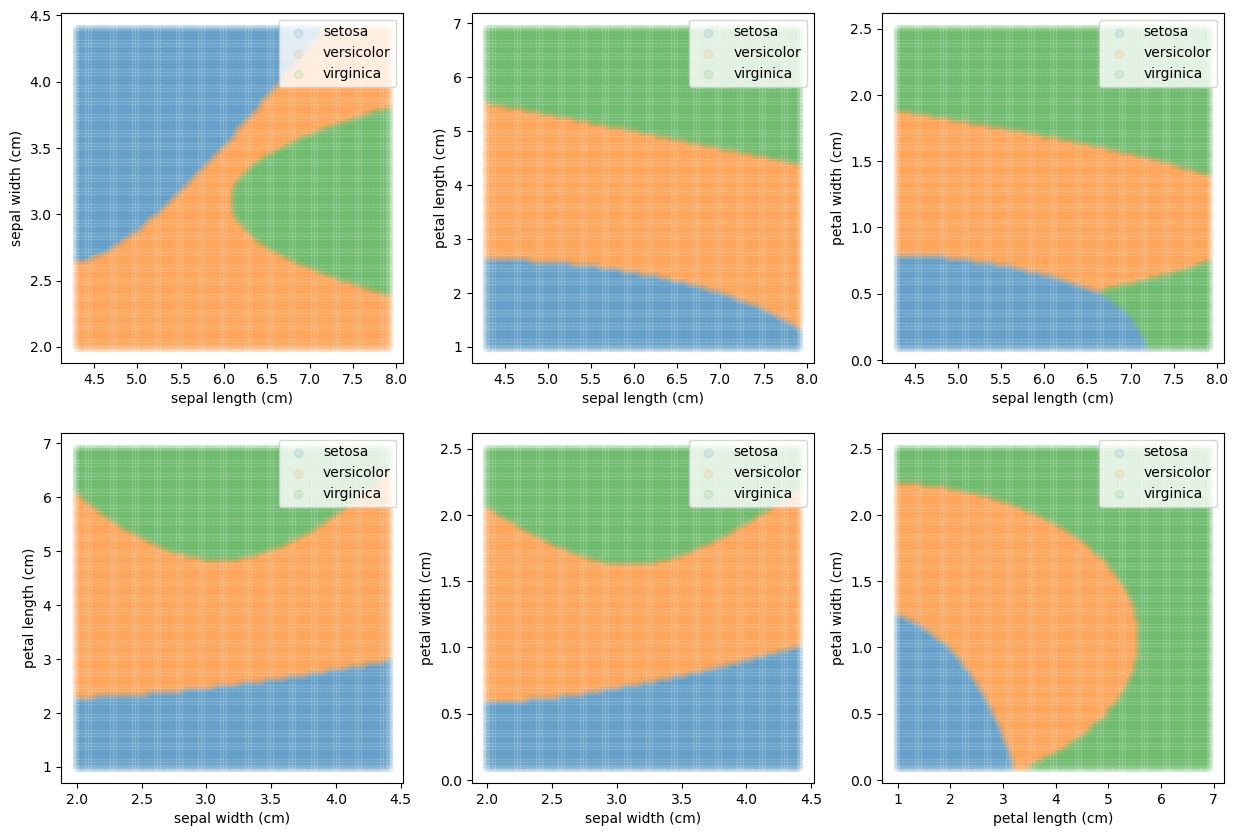

In [189]:
## plot decision boundary for every 2 features
axr = 0
axc = 0
r = 2
c = 3
fig, ax = plt.subplots(r, c, figsize=(15, 10))
for i in range(len(iris.feature_names)-1):
    for j in range(i+1, len(iris.feature_names)):
            ax[axr, axc].set_xlabel(iris.feature_names[i])
            ax[axr,axc].set_ylabel(iris.feature_names[j])
            N = 100
            #lin space from min of first feature to max
            X = np.linspace(np.min(Data[:,i]), np.max(Data[:,i]), N)
            Y = np.linspace(np.min(Data[:,j]), np.max(Data[:,j]), N)
            X, Y = np.meshgrid(X, Y)

            inputGrid = np.array([X.flatten(), Y.flatten()]).T
            miniModelSet = trainNaiveSet(dSplit[0][:,[i,j]], lSplit[0])
            miniModel = bestModel(miniModelSet, dSplit[1][:,[i,j]], lSplit[1])
            pred = miniModel.predict(inputGrid)
            for k,plant in enumerate(['setosa', 'versicolor', 'virginica']):
                ax[axr,axc].scatter(inputGrid[pred == k, 0], inputGrid[pred == k, 1], alpha=0.1, label=plant)
            ax[axr,axc].legend()
            axc += 1
            if axc == c:
                axc = 0
                axr += 1
            